In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mf.manfit_ours import manfit_ours

from time import time

In [2]:
NumTrials = 1

D = 2
dim = 1
tau = 1
sigma = 0.06

r = 2 * np.sqrt(tau * sigma)

In [3]:
np.random.seed(1)

NumSamples = 3000
NumIni = 300

t1 = np.random.rand(1, NumSamples) * 2 * np.pi
samples = np.vstack((np.cos(t1), np.sin(t1))) + sigma * np.random.randn(2, NumSamples)

t = np.random.rand(1, 2 * NumIni) * 2 * np.pi
data_ini = np.vstack((np.cos(t), np.sin(t))) + 2 * sigma / np.sqrt(D) * (2 * np.random.rand(2, 2 * NumIni) - 1)
proj_data_ini = data_ini * (tau / np.sqrt(np.sum(data_ini**2, axis=0)))
norm_n2 = np.sum((data_ini - proj_data_ini)**2, axis=0)
Index = np.argsort(norm_n2)[::-1]
data_ini = data_ini[:, Index[:NumIni]]

tic = time()
Mout = manfit_ours(samples.T, sigma, data_ini.T)
Mout = Mout.T
toc = time() - tic

proj_Mout = Mout * (tau / np.sqrt(np.sum(Mout**2, axis=0)))            

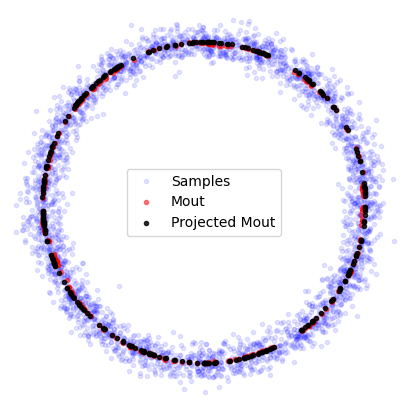

In [4]:
fig_width = 5 
fig_height = 5 
plt.figure(figsize=(fig_width, fig_height))
plt.plot(samples[0, :], samples[1, :], 'b.', alpha=0.1, label='Samples')
plt.plot(Mout[0, :], Mout[1, :], 'r.', alpha=0.5, label='Mout')
plt.plot(proj_Mout[0, :], proj_Mout[1, :], 'k.', alpha=0.8,label='Projected Mout')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.box(False)
plt.axis('off')
plt.legend()
plt.show()